## Car Sales Regression implemention in R

In [1]:
dataset <- read.csv('car sales.csv')
head(dataset, 5)

Brand,Price,Body,Mileage,EngineV,Engine.Type,Registration,Year,Model
BMW,4200,sedan,277,2.0,Petrol,yes,1991,320
Mercedes-Benz,7900,van,427,2.9,Diesel,yes,1999,Sprinter 212
Mercedes-Benz,13300,sedan,358,5.0,Gas,yes,2003,S 500
Audi,23000,crossover,240,4.2,Petrol,yes,2007,Q7
Toyota,18300,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [2]:
summary(dataset)

           Brand         Price               Body         Mileage     
 Audi         :457   Min.   :   600   crossover: 901   Min.   :  0.0  
 BMW          :694   1st Qu.:  6999   hatch    : 285   1st Qu.: 86.0  
 Mercedes-Benz:921   Median : 11500   other    : 433   Median :155.0  
 Mitsubishi   :327   Mean   : 19419   sedan    :1649   Mean   :161.2  
 Renault      :469   3rd Qu.: 21700   vagon    : 402   3rd Qu.:230.0  
 Toyota       :541   Max.   :300000   van      : 675   Max.   :980.0  
 Volkswagen   :936   NA's   :172                                      
    EngineV       Engine.Type   Registration      Year          Model     
 Min.   : 0.600   Diesel:2019   no : 398     Min.   :1969   E-Class: 199  
 1st Qu.: 1.800   Gas   : 613   yes:3947     1st Qu.:2003   A6     : 172  
 Median : 2.200   Other : 154                Median :2008   Vito   : 171  
 Mean   : 2.791   Petrol:1559                Mean   :2007   Kangoo : 146  
 3rd Qu.: 3.000                              3rd Qu.:2012

In [3]:
# listing out the dataset columns

names(dataset)

[1] "Brand"        "Price"        "Body"         "Mileage"      "EngineV"     
[6] "Engine.Type"  "Registration" "Year"         "Model"

In [4]:
# Droping the Model column

# can also use the line of code below
#dataset <- subset(dataset, select = c('Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine.Type', 'Registration', 'Year'))

dataset = dataset[,!(names(dataset) %in% 'Model')]

head(dataset,5)

Brand,Price,Body,Mileage,EngineV,Engine.Type,Registration,Year
BMW,4200,sedan,277,2.0,Petrol,yes,1991
Mercedes-Benz,7900,van,427,2.9,Diesel,yes,1999
Mercedes-Benz,13300,sedan,358,5.0,Gas,yes,2003
Audi,23000,crossover,240,4.2,Petrol,yes,2007
Toyota,18300,crossover,120,2.0,Petrol,yes,2011


In [5]:
# checking the number of missing values

na_count <-sapply(dataset, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
na_count

,na_count
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine.Type,0
Registration,0
Year,0


In [6]:
# drop all the null value

dataset <- na.omit(dataset)
summary(dataset)

           Brand         Price               Body         Mileage     
 Audi         :420   Min.   :   600   crossover: 824   Min.   :  0.0  
 BMW          :640   1st Qu.:  6999   hatch    : 268   1st Qu.: 90.0  
 Mercedes-Benz:823   Median : 11500   other    : 394   Median :158.0  
 Mitsubishi   :307   Mean   : 19552   sedan    :1534   Mean   :163.6  
 Renault      :445   3rd Qu.: 21900   vagon    : 379   3rd Qu.:230.0  
 Toyota       :510   Max.   :300000   van      : 626   Max.   :980.0  
 Volkswagen   :880                                                    
    EngineV       Engine.Type   Registration      Year     
 Min.   : 0.600   Diesel:1861   no : 371     Min.   :1969  
 1st Qu.: 1.800   Gas   : 590   yes:3654     1st Qu.:2003  
 Median : 2.200   Other : 106                Median :2007  
 Mean   : 2.765   Petrol:1468                Mean   :2006  
 3rd Qu.: 3.000                              3rd Qu.:2012  
 Max.   :99.990                              Max.   :2016  
            

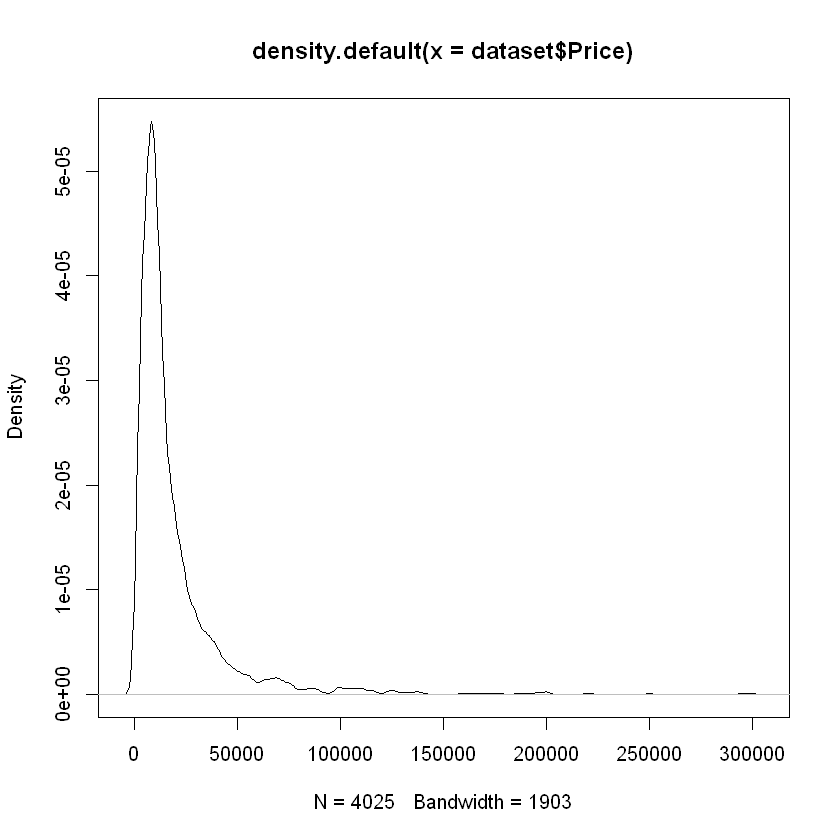

In [7]:
# ploting to check for outliers in price columns

price <- density(dataset$Price)
plot(price)

In [8]:
# removing outlier from the price columns


dataset <- subset(dataset, dataset$Price < quantile(dataset$Price, 0.99))

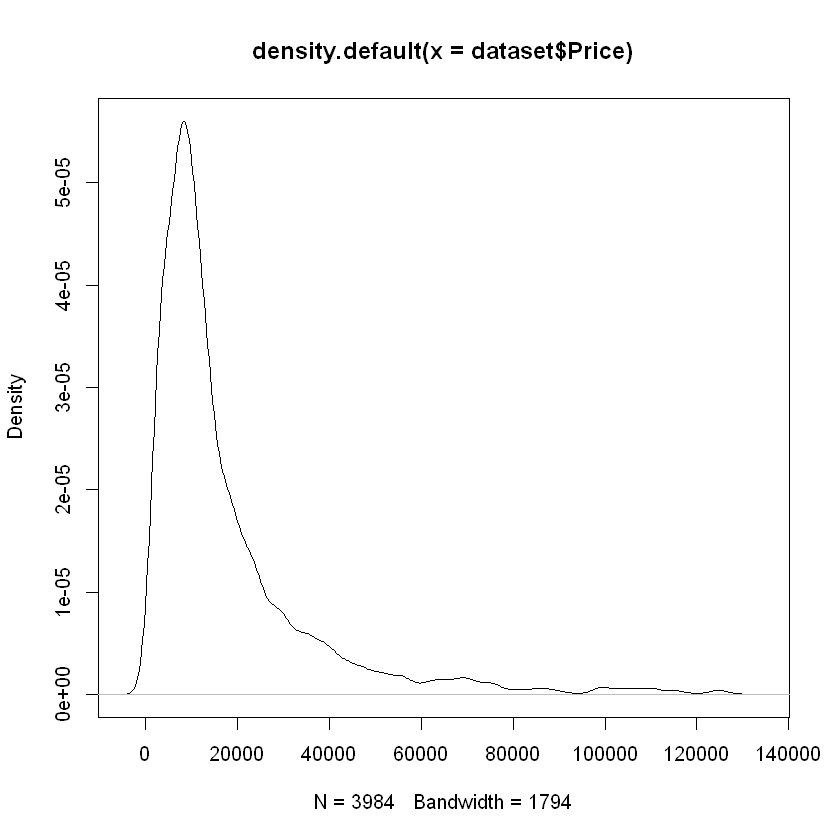

In [9]:
# ploting for price column one more to see outlier removed
price <- density(dataset$Price)
plot(price)

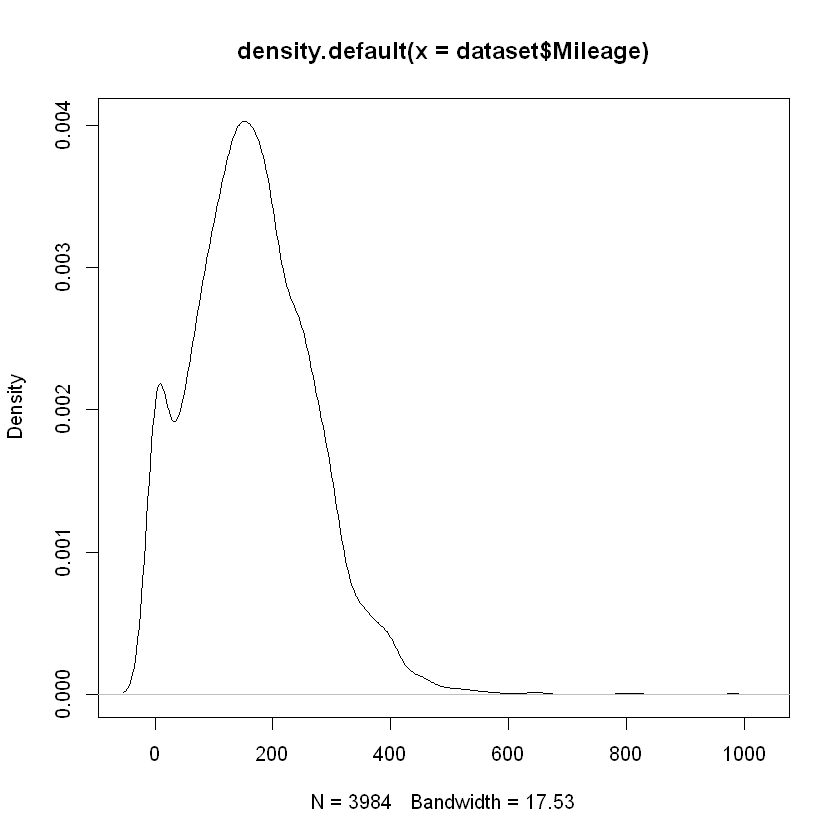

In [10]:
# ploting to check for outlier in mileage column

mileage <- density(dataset$Mileage)
plot(mileage)

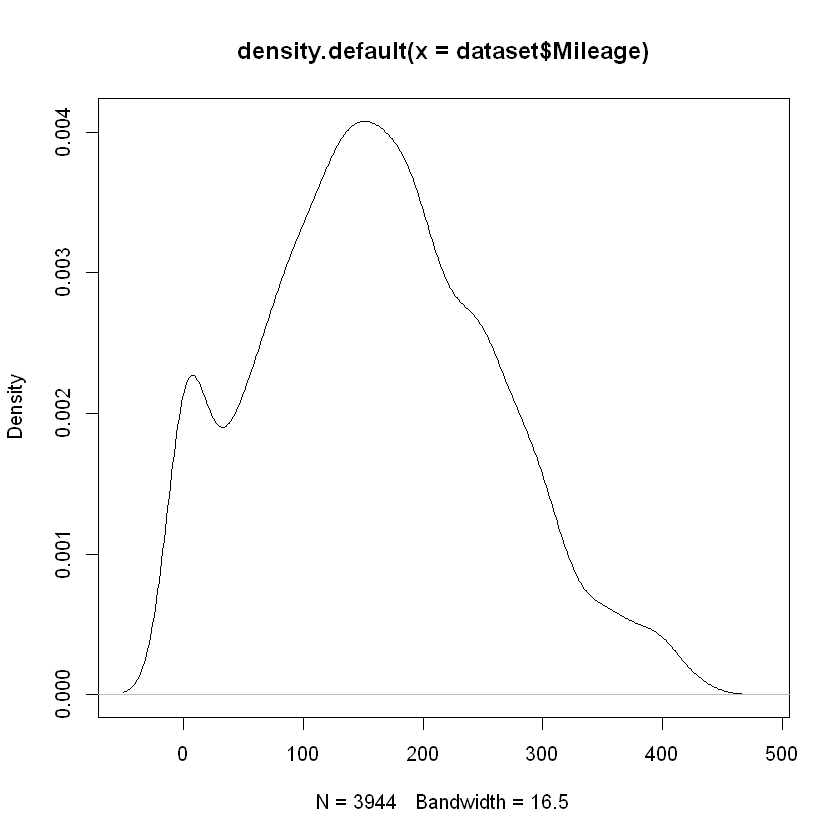

In [11]:
# to remove outlier in the mileage column 

dataset <- subset(dataset, dataset$Mileage < quantile(dataset$Mileage, 0.99))

mileage <- density(dataset$Mileage)
plot(mileage)

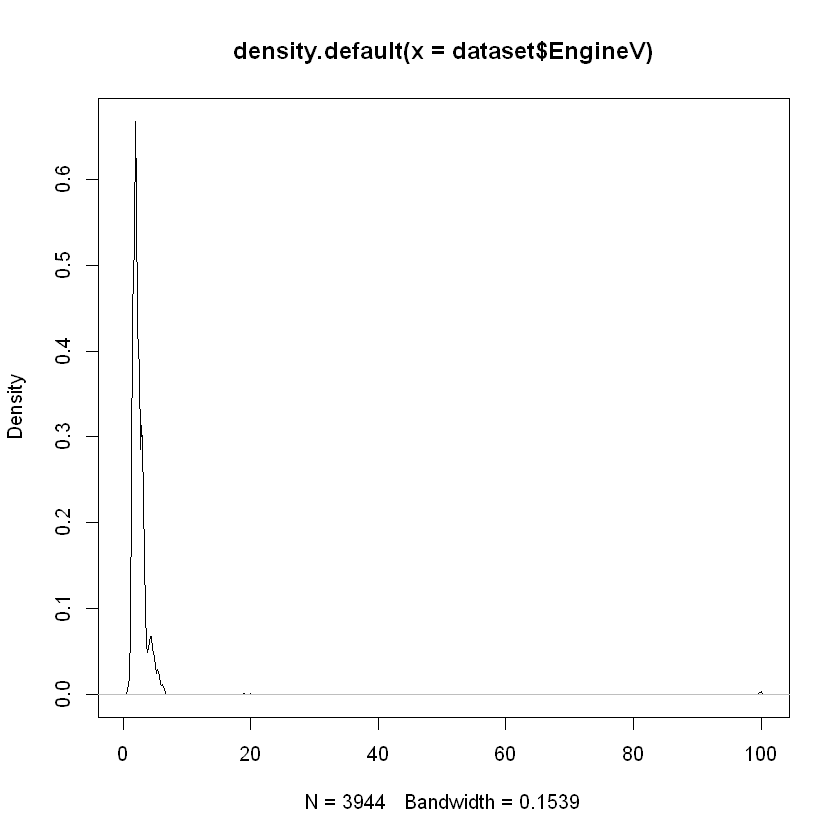

In [12]:
engineV <- density(dataset$EngineV)
plot(engineV)

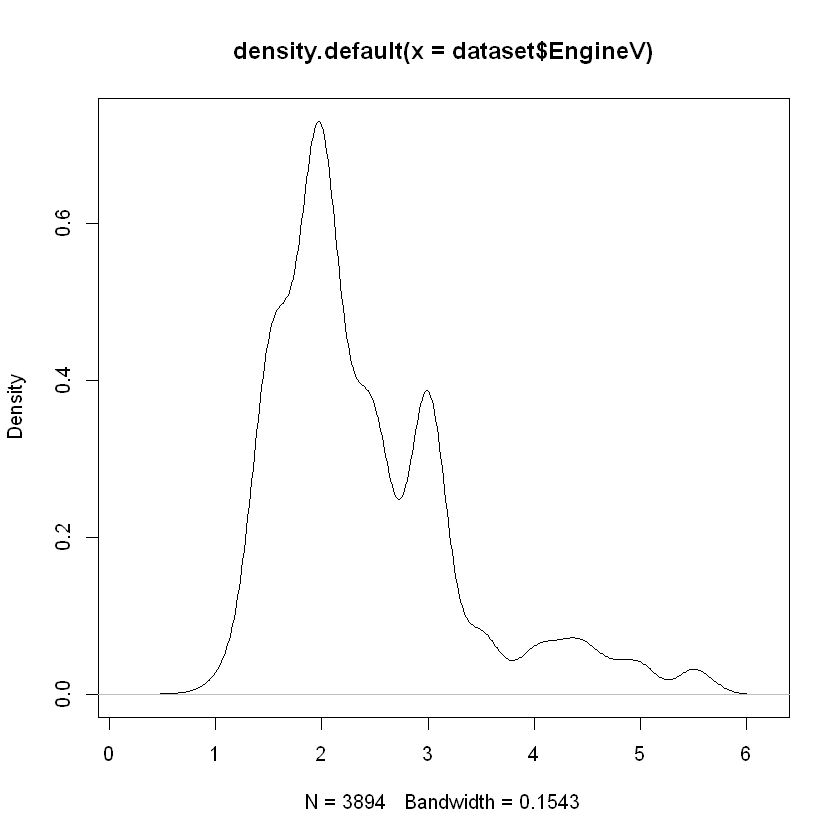

In [13]:
# reducing engine volume to value of 6 to remove outragoeus imput

dataset <- subset(dataset, dataset$EngineV < 6)

engineV <- density(dataset$EngineV)
plot(engineV)

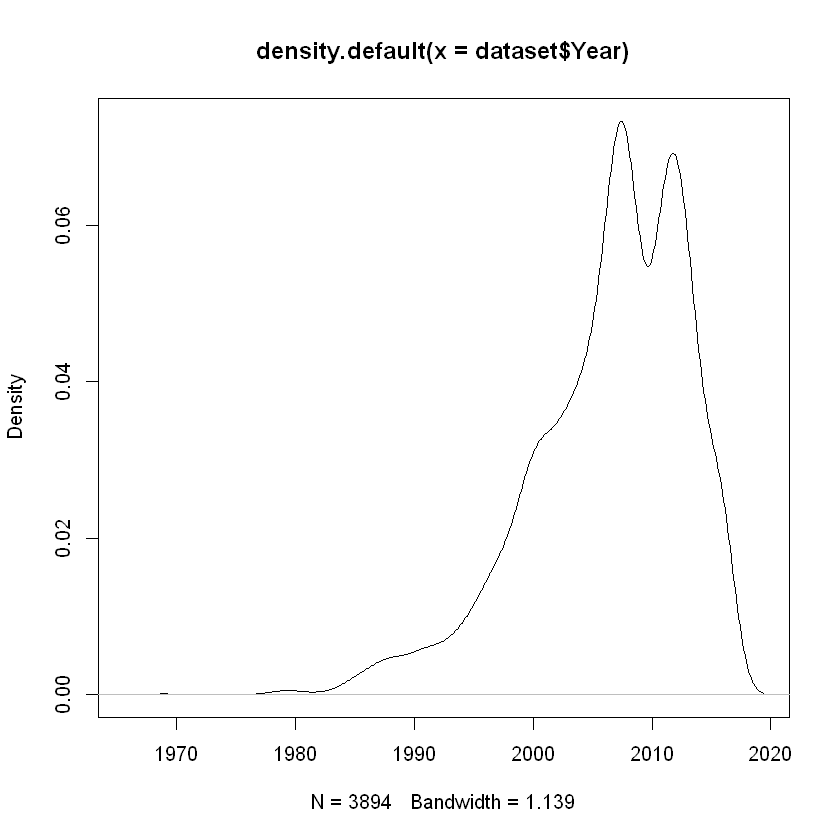

In [14]:
year <- density(dataset$Year)
plot(year)

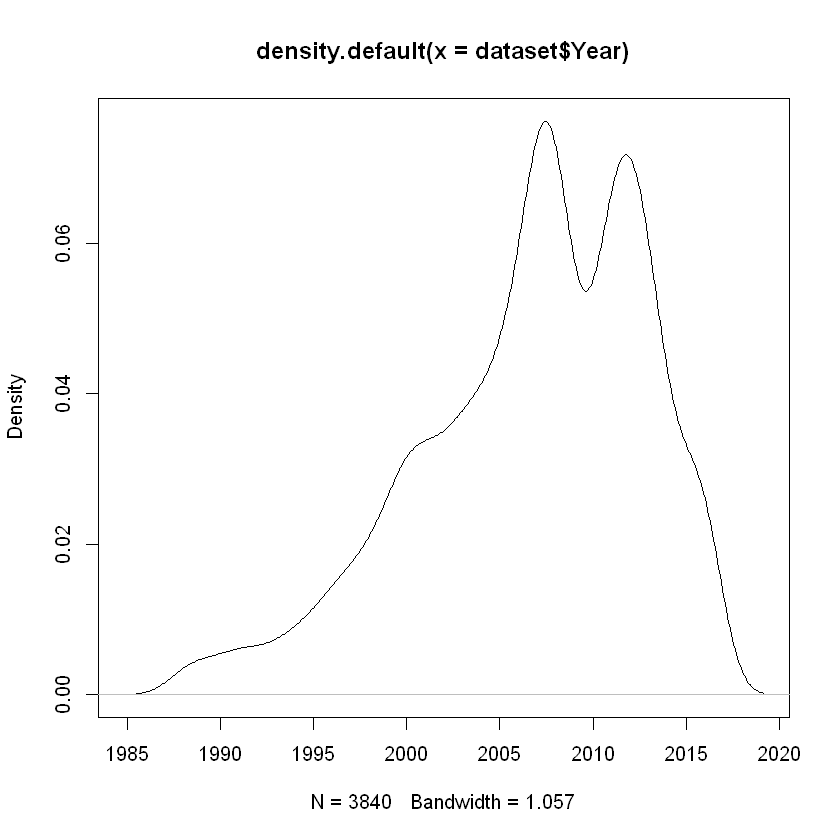

In [15]:
# removing the outliers from the year column

dataset <- subset(dataset, dataset$Year>quantile(dataset$Year, 0.01))

year <- density(dataset$Year)
plot(year)